# The Sound of Music

In this activity you will use features of music to predict its geographic origin (as represented in longitude and latitude coordinates.

## The Dataset

The dataset contains `68` encoded features of music composition (columns from `0` to `67`) from a music streaming service. The last two columns of the dataset (columns `68` and `69`) are the geographical coordinates where the song was played.

In [1]:
# Initial imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\TinkerBell\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read in data
data = Path("../Resources/music.csv")
df = pd.read_csv(data, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85


In [3]:
# Create the features set (X) and the target set (y)
X = df.iloc[:, 0:68].values
y = df.iloc[:, 68:70].values

In [6]:
# Scale the data of the features set using the StandardScaler
from sklearn.preprocessing import StandardScaler
# YOUR CODE HERE
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [16]:
# Create a shallow, 1 hidden layer, neural network
number_hidden_nodes = 34
number_input_features = 68
nn = Sequential()

# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=2, activation="linear"))

In [17]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=210)

Epoch 1/210
24/24 [==============================] - 1s 43ms/step - loss: 2592.2166 - mse: 2592.2166 - val_loss: 2321.9656 - val_mse: 2321.9656
Epoch 2/210
24/24 [==============================] - 0s 11ms/step - loss: 2534.9592 - mse: 2534.9592 - val_loss: 2273.7327 - val_mse: 2273.7327
Epoch 3/210
24/24 [==============================] - 0s 11ms/step - loss: 2473.9871 - mse: 2473.9871 - val_loss: 2217.3079 - val_mse: 2217.3079
Epoch 4/210
24/24 [==============================] - 0s 10ms/step - loss: 2400.4954 - mse: 2400.4954 - val_loss: 2151.4692 - val_mse: 2151.4692
Epoch 5/210
24/24 [==============================] - 0s 11ms/step - loss: 2314.8430 - mse: 2314.8430 - val_loss: 2075.3594 - val_mse: 2075.3594
Epoch 6/210
24/24 [==============================] - 0s 9ms/step - loss: 2215.1292 - mse: 2215.1292 - val_loss: 1987.1698 - val_mse: 1987.1698
Epoch 7/210
24/24 [==============================] - 0s 8ms/step - loss: 2107.5261 - mse: 2107.5261 - val_loss: 1897.5863 - val_mse: 1897

In [18]:
# Define the model - deep neural network with two layers
number_input_features = 68
hidden_nodes_layer1 = 34
hidden_nodes_layer2 = 17

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=2, activation="linear"))

In [19]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=210)

Epoch 1/210
24/24 [==============================] - 1s 32ms/step - loss: 2561.9905 - mse: 2561.9905 - val_loss: 2276.3933 - val_mse: 2276.3933
Epoch 2/210
24/24 [==============================] - 0s 9ms/step - loss: 2475.2156 - mse: 2475.2156 - val_loss: 2192.8230 - val_mse: 2192.8230
Epoch 3/210
24/24 [==============================] - 0s 19ms/step - loss: 2358.2939 - mse: 2358.2939 - val_loss: 2068.4097 - val_mse: 2068.4097
Epoch 4/210
24/24 [==============================] - 0s 8ms/step - loss: 2186.7229 - mse: 2186.7229 - val_loss: 1892.7467 - val_mse: 1892.7467
Epoch 5/210
24/24 [==============================] - 0s 7ms/step - loss: 1958.6207 - mse: 1958.6207 - val_loss: 1676.3276 - val_mse: 1676.3276
Epoch 6/210
24/24 [==============================] - 0s 7ms/step - loss: 1707.8767 - mse: 1707.8767 - val_loss: 1491.2528 - val_mse: 1491.2528
Epoch 7/210
24/24 [==============================] - 0s 8ms/step - loss: 1516.3470 - mse: 1516.3470 - val_loss: 1393.7693 - val_mse: 1393.76

# Evaluate the models

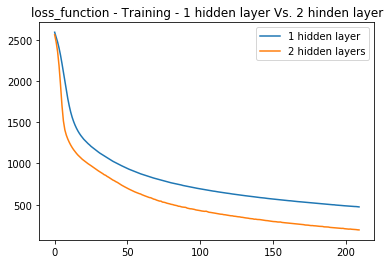

In [20]:
# Plot the loss function of the training results for the two models
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training - 1 hidden layer Vs. 2 hinden layer")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

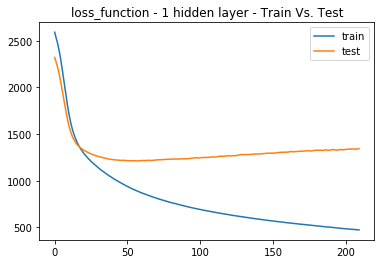

In [21]:
# Plot train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - 1 hidden layer - Train Vs. Test")
plt.legend(["train", "test"])
plt.show()

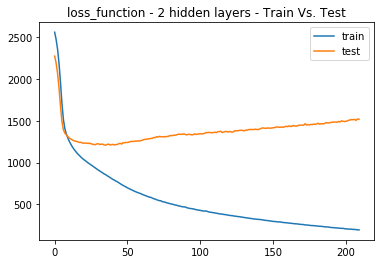

In [22]:
# Plot train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - 2 hidden layers - Train Vs. Test")
plt.legend(["train", "test"])
plt.show()